In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
np.random.seed(50)

# generate prices to be roughly $600 per square-foot
sqft = [0, 100, 200, 201, 210, 214, 215, 220, 500, 550, 600, 750, 800, 850, 855, 856, 857, 890, 892, 899, 900, 920, 1385, 1200, 1400, 1500, 1550, 1800, 2000]
prices = [np.round(i * np.random.normal(600, 200), 0)**(1/2) for i in sqft]
df = pd.DataFrame({'sqft': sqft, 'price': prices})

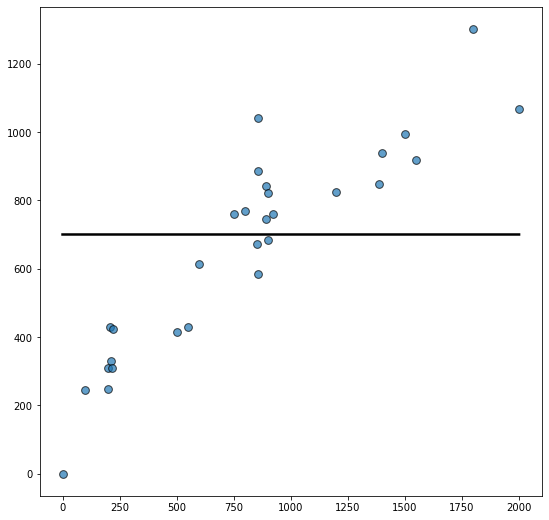

In [4]:
# Generate data
x = df.sqft
y = df.price

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
a_flat = 700
b_flat = 0

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, np.max(sqft), num=20000)

# Plot regression line
ax.plot(xseq, a_flat + b_flat * xseq, color="k", lw=2.5);

intercept:  244.510192180092
slope:  0.5198169459207218


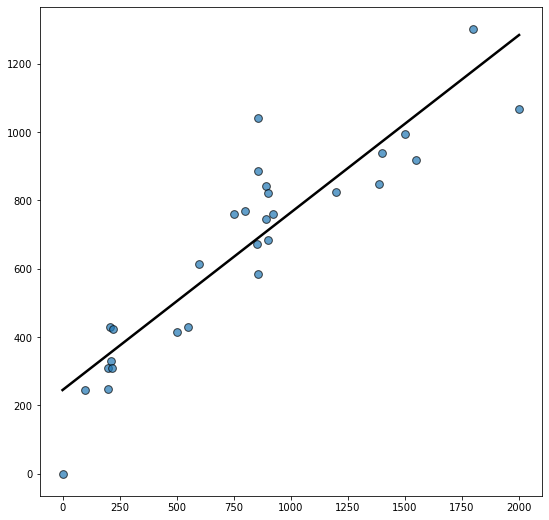

In [5]:
# Generate data
x = df.sqft
y = df.price

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
print('intercept: ', a)
print('slope: ', b)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, np.max(sqft), num=20000)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

intercept:  -39.783702961919865
slope:  26.6407623043746


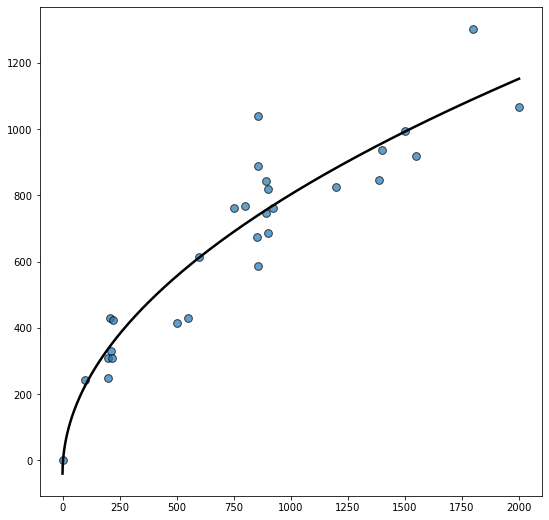

In [6]:
# Generate data
x = df.sqft
y = df.price

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b_sqrt, a_sqrt = np.polyfit(np.sqrt(x), y, deg=1)
print('intercept: ', a_sqrt)
print('slope: ', b_sqrt)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, np.max(sqft), num=20000)

# Plot regression line
ax.plot(xseq, a_sqrt + b_sqrt * np.sqrt(xseq), color="k", lw=2.5);

In [7]:
df['regressionLine'] = np.round(a + b * df['sqft'], 1)
df['regressionLineFlat'] = np.round(a_flat + b_flat * df['sqft'], 1)
df['regressionLineSqrt'] = np.round(a_sqrt + b_sqrt * np.sqrt(df['sqft']), 1)

In [8]:
df['sqft'] = df.sqft.astype(np.float)

In [9]:
df.to_json('scatterData2.json', orient='records')

In [10]:
df

,sqft,price,regressionLine,regressionLineFlat,regressionLineSqrt
0,0.0,0.000000,244.5,700,-39.8
1,100.0,243.680118,296.5,700,226.6
2,200.0,308.485008,348.5,700,337.0
3,201.0,248.443152,349.0,700,337.9
4,210.0,430.467188,353.7,700,346.3
5,214.0,328.627449,355.8,700,349.9
6,215.0,308.933650,356.3,700,350.8
7,220.0,423.192628,358.9,700,355.4
8,500.0,414.452651,504.4,700,555.9
9,550.0,428.925401,530.4,700,585.0


# Gradients

In [11]:
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.00001, iterations=400):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        b = 0
        m = 0
        n = X.shape[0]
        print('n', n)
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*X + b) / n
            print('b_gradient', b_gradient)
            m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
            print('m_gradient', m_gradient)
            b = b + (self.learning_rate * b_gradient)
            print('b', b)
            m = m - (self.learning_rate * m_gradient)
            print('m', m)
        self.m, self.b = m, b
        
    def predict(self, X):
        return self.m*X + self.b

In [12]:
y = df.price
X = df.sqft

n 29
b_gradient -1324.8143345116118
m_gradient -1345791.8367084803
b -0.01324814334511612
m 13.457918367084803
b_gradient 20313.688631445086
m_gradient 23318116.612835765
b 0.18988874296933475
m -219.72324776127286
b_gradient -354609.8698572606
m_gradient -404025797.0697453
b -3.3562099556032714
m 3820.5347229361805
b_gradient 6141574.762260166
m_gradient 7000430026.920133
b 58.059537666998395
m -66183.76554626515
b_gradient -106415807.13655643
m_gradient -121294285994.56544
b -1006.098533698566
m 1146759.0943993896
b_gradient 1843831137.508758
m_gradient 2101628579681.261
b 17432.212841389017
m -19869526.702413224
b_gradient -31947494502.347736
m_gradient -36414268411094.98
b -302042.73218208837
m 344273157.4085366
b_gradient 553544353920.8308
m_gradient 630938766599893.4
b 5233400.8070262205
m -5965114508.590397
b_gradient -9591091823524.809
m_gradient -1.0932080872927958e+16
b -90677517.42822187
m 103355694220.6892
b_gradient 166181881702754.72
m_gradient 1.894167842249963e+17
b 157

m_gradient 7.553630866739064e+170
b 6.265453964564543e+162
m -7.14146530004581e+165
b_gradient -1.1482503703685035e+169
m_gradient -1.3087942585053117e+172
b -1.0855958307228582e+164
m 1.2373796055048536e+167
b_gradient 1.9895379037944309e+170
m_gradient 2.267707333487893e+173
b 1.880978320722145e+165
m -2.143969372937408e+168
b_gradient -3.447210793726485e+171
m_gradient -3.929186361367203e+174
b -3.259112961654271e+166
m 3.714789424073462e+169
b_gradient 5.9728755273879025e+172
m_gradient 6.807979686959221e+175
b 5.646964231222475e+167
m -6.436500744551875e+170
b_gradient -1.034901669796173e+174
m_gradient -1.1795975847254514e+177
b -9.784320274839484e+168
m 1.1152325772799327e+172
b_gradient 1.793142115947114e+175
m_gradient 2.0438522526080108e+178
b 1.695298913198719e+170
m -1.9323289948800177e+173
b_gradient -3.1069218862276693e+176
m_gradient -3.541319586088424e+179
b -2.937391994907798e+171
m 3.3480866866004226e+174
b_gradient 5.3832674617772485e+177
m_gradient 6.135934921328536

m 2.7637358877812805e+293
b_gradient 4.4437109520440055e+296
m_gradient 5.065013285060725e+299
b 4.2012388647680593e+291
m -4.7886396962825976e+294
b_gradient -7.699480532073072e+297
m_gradient -8.77599186893071e+300
b -7.279356645596266e+292
m 8.29712789930245e+295
b_gradient 1.3340651789357247e+299
m_gradient 1.5205889688523205e+302
b 1.2612716124797622e+294
m -1.437617689859296e+297
b_gradient -2.31149347574182e+300
m_gradient -2.6346774777459843e+303
b -2.185366314493844e+295
m 2.4909157087600546e+298
b_gradient 4.005053255838279e+301
m_gradient 4.565024180716717e+304
b 3.786516624388895e+296
m -4.3159326098407124e+299
b_gradient -6.939431908607481e+302
m_gradient -7.909676211433999e+305
b -6.560780246168592e+297
m 7.478082950449928e+300
b_gradient 1.2023739046166672e+304
m_gradient inf
b 1.1367661021549812e+299
m -inf
b_gradient -inf
m_gradient -inf
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.

<ipython-input-11-c2730eecb65b>:17: RuntimeWarning: invalid value encountered in double_scalars
  m = m - (self.learning_rate * m_gradient)


 -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -inf
m nan
b_gradient -0.0
m_gradient -0.0
b -i

Text(0.5, 1.0, 'Gradient Descent Linear Regressor')

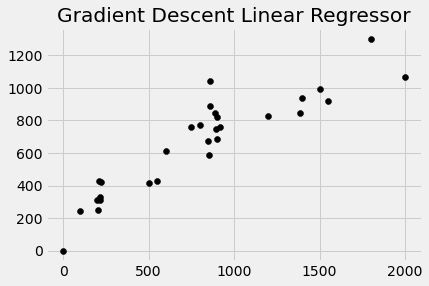

In [13]:
clf = GradientDescentLinearRegression()
clf.fit(X, y)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(X, y, color='black')
plt.plot(X, clf.predict(X))
plt.gca().set_title("Gradient Descent Linear Regressor")

In [159]:
gdWeight = 0
gdBias = 700
learning_rate = 0.001
N = df.shape[0]
iterations = 1

In [117]:
for _ in range(10):
    for i in range(iterations):
        biasDifference = df.price - gdWeight * df.sqft + gdBias
#         print('biasDifference', biasDifference)
        biasSum = np.sum(biasDifference)
#         print('biasSum', biasSum)
        b_gradient = (-2/N) * biasSum
#         print('b_gradient', np.round(b_gradient, 3))
        bias = gdBias + (learning_rate * b_gradient)
        gdBias = np.round(bias, 3)
        print('bias', gdBias)

bias 697.179
bias 694.363
bias 691.553
bias 688.748
bias 685.949
bias 683.156
bias 680.368
bias 677.586
bias 674.809
bias 672.038
bias 669.273
bias 666.513
bias 663.759
bias 661.01
bias 658.267
bias 655.529
bias 652.797
bias 650.07
bias 647.348
bias 644.632
bias 641.921
bias 639.216
bias 636.516
bias 633.822
bias 631.133
bias 628.449
bias 625.771
bias 623.098
bias 620.43
bias 617.768
bias 615.111
bias 612.459
bias 609.813
bias 607.172
bias 604.536
bias 601.906
bias 599.281
bias 596.661
bias 594.046
bias 591.436
bias 588.832
bias 586.233
bias 583.639
bias 581.05
bias 578.466
bias 575.888
bias 573.315
bias 570.747
bias 568.184
bias 565.626
bias 563.073
bias 560.525
bias 557.983
bias 555.446
bias 552.914
bias 550.387
bias 547.865
bias 545.348
bias 542.836
bias 540.329
bias 537.827
bias 535.33
bias 532.838
bias 530.351
bias 527.869
bias 525.392
bias 522.92
bias 520.453
bias 517.991
bias 515.534
bias 513.082
bias 510.634
bias 508.191
bias 505.753
bias 503.32
bias 500.892
bias 498.469
bias 4

In [162]:
for _ in range(1):
    for i in range(iterations):
        biasDifference = df.price - gdWeight * df.sqft + gdBias
        biasSum = np.sum(biasDifference)
        b_gradient = (-2/N) * biasSum
        bias = gdBias + (learning_rate * b_gradient)
        gdBias = np.round(bias, 3)
        print('bias', gdBias)
        
        
        weightDifference = df.sqft * (df.price - (gdWeight * df.sqft + gdBias))
        print('weightDifference', weightDifference)
        weightSum = np.sum(weightDifference)
        print('weightSum', weightSum)
        w_gradient = (-2/N) * weightSum
        print('w_gradient', np.round(w_gradient, 3))
        weight = gdWeight - (learning_rate * w_gradient)
        gdWeight = np.round(weight, 3)
        print('weight', gdWeight)

bias -1764349.077
weightDifference 0     0.000000e+00
1     4.291907e+10
2     2.205665e+11
3     2.667883e+11
4     3.174041e+11
5     4.956128e+11
6     5.638031e+11
7     7.133650e+11
8     7.453860e+11
9     1.688058e+12
10    1.267498e+12
11    1.724794e+12
12    1.979804e+12
13    2.113900e+12
14    2.850282e+12
15    3.518476e+12
dtype: float64
weightSum 18508658319592.336
w_gradient -2313582289949.042
weight 2312703553.801


In [52]:
b_gradient = (-2/N) * biasSum
print(np.round(b_gradient, 3))

-2821.412


In [53]:
gdBias += learning_rate * b_gradient
print(gdBias)

697.178587625
